<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week5_Day1_Exercise_XP_Exercise_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -k kaggle
from google.colab import files
files.upload()

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Exercise 1

Visualization provides a visual representation of data, making it easier for analysts to understand the underlying patterns, trends, and relationships within the data. It allows for quick insights into the data distribution, outliers, and other characteristics that might not be immediately apparent from raw data.
By visualizing the data it's easier to create a storytelling from this.

A line graph is mainly used to visualize trends over a timelapse. They are particularly useful for analyzing time-series data, such as stock prices, weather patterns, or sales trends, where understanding the temporal evolution of a variable is important.

Exercise 2

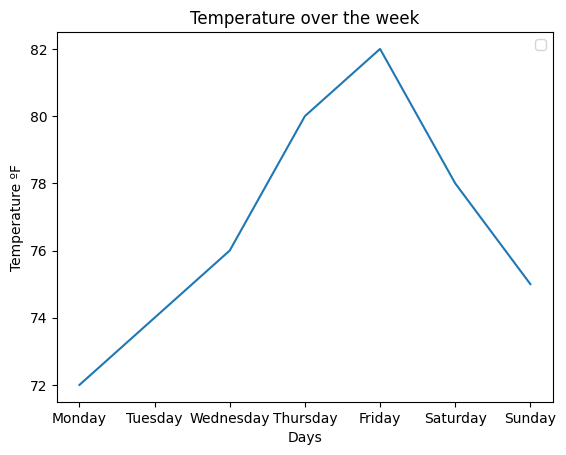

In [127]:
import matplotlib.pyplot as plt

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temperature = [72, 74, 76, 80, 82, 78, 75]

plt.plot(days, temperature)
plt.xlabel('Days')
plt.ylabel('Temperature ºF')
plt.title('Temperature over the week')
plt.legend()
plt.show()


Exercise 3

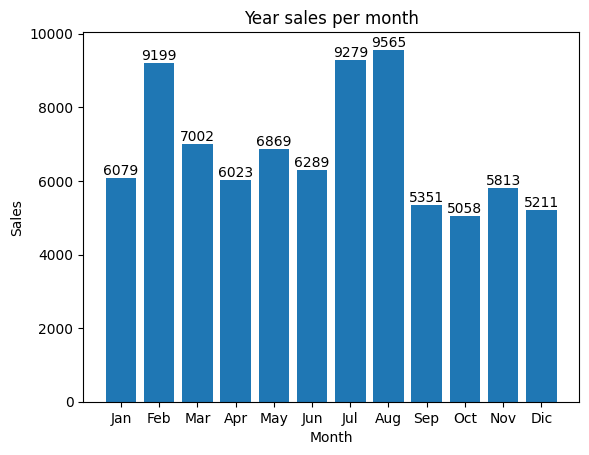

In [134]:
import random

sales = random.sample(range(5000, 10000 + 1), 12)

month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic']

plt.bar(month,sales, label ='Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Year sales per month')

# Annotate each bar with its corresponding value
for i, val in enumerate(sales):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.show()

Exercise 4

In [77]:
import pandas as pd
df = pd.read_csv('sales_data.csv')
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [70]:
df.dtypes

date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,367.0,211.226158,227.33517,20.0,50.0,100.0,300.0,1200.0
quantity,368.0,14.565217,8.59574,3.0,8.0,12.0,20.0,50.0
revenue,368.0,2060.679348,1910.93079,300.0,800.0,1200.0,2400.0,7200.0


In [72]:
df.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [73]:
# Create a copy of the DataFrame to avoid overwriting the original data
df_imputed = df.copy()

# Remove rows with missing values
df_cleaned = df_imputed.dropna(subset=['quantity'])

In [88]:
total_quantity = df_cleaned['quantity'].sum()
print(f"The total quantity of products sold by the company is {total_quantity}")

The total quantity of products sold by the company is 5360.0


In [81]:
highest_revenue = df.groupby(['category'])['revenue'].sum()

print(highest_revenue.sort_values())

category
Bgas              900.0
Shoeses           960.0
Clohting         1200.0
Bags            19500.0
Shoes           20640.0
Clothing        94350.0
Accessories    104700.0
Electronics    516080.0
Name: revenue, dtype: float64


In [87]:
print(f"The average revenue per sale is {df['revenue'].mean()}")

avg_revenue = df.groupby(['category'])['revenue'].mean()
print(f"The average revenue per category is\n {avg_revenue.sort_values()}")



The average revenue per sale is 2060.679347826087
The average revenue per category is
 category
Clothing        786.250000
Bags            847.826087
Shoes           897.391304
Bgas            900.000000
Shoeses         960.000000
Clohting       1200.000000
Accessories    1517.391304
Electronics    3969.846154
Name: revenue, dtype: float64


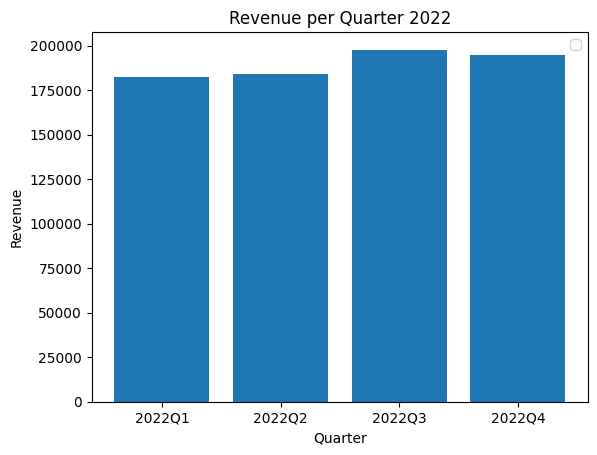

In [101]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

#calculate sum of values, grouped by quarter
revenue_quarter = df.groupby(df['date'].dt.to_period('Q'))['revenue'].sum()


plt.bar(revenue_quarter.index.astype(str),revenue_quarter)
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.title('Revenue per Quarter 2022')
plt.legend()
plt.show()

Exercise 5

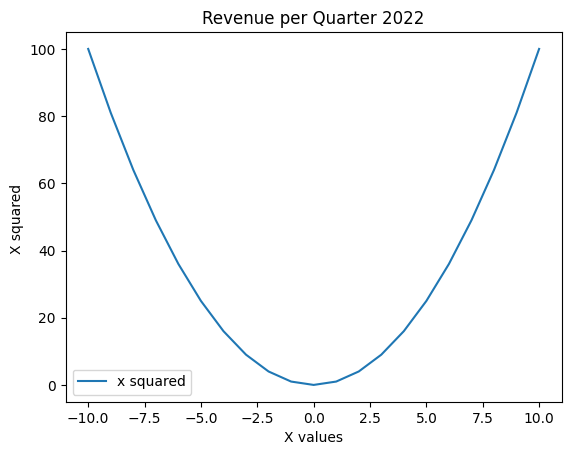

In [104]:
x_values = [x for x in range(-10,11)]
y_values = [x**2 for x in x_values]

plt.plot(x_values, y_values,label='x squared')
plt.xlabel('X values')
plt.ylabel('X squared ')
plt.title('Revenue per Quarter 2022')
plt.legend()
plt.show()

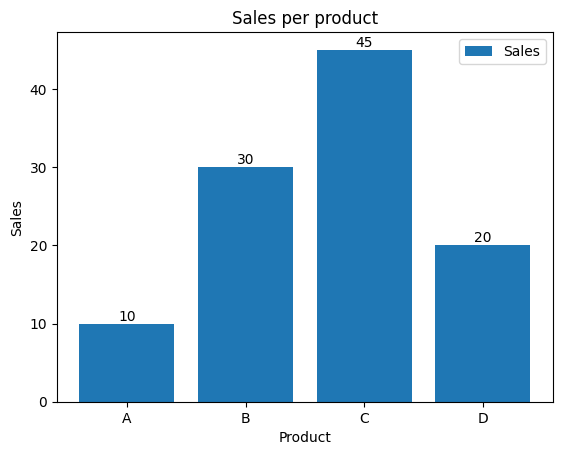

In [117]:
data = {'product': ['A','B','C','D'], 'sales':[10,30,45,20]}

df = pd.DataFrame(data)

plt.bar(df['product'], df['sales'], label = 'Sales')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales per product')
plt.legend()

# Annotate each bar with its corresponding value
for i, value in enumerate(df['sales']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

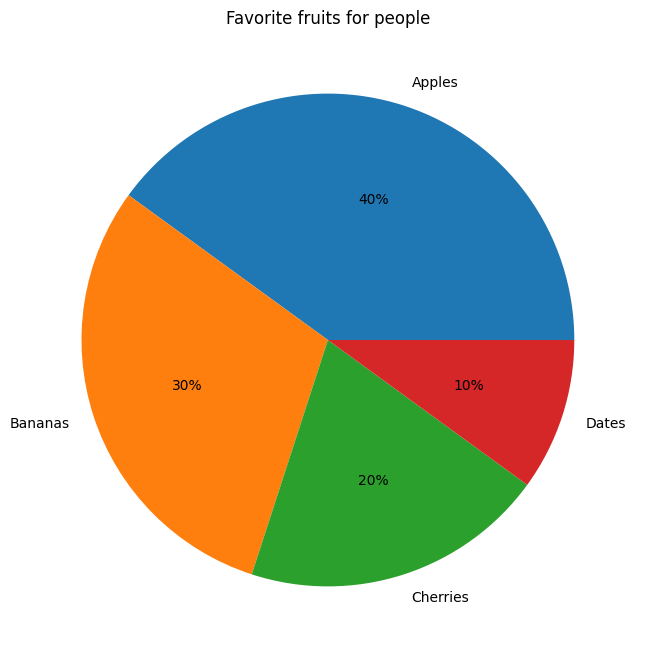

In [122]:
fruit = ['Apples', 'Bananas', 'Cherries', 'Dates']
values = ['0.4','0.3', '0.2','0.1']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=fruit, autopct='%1.0f%%')
plt.title('Favorite fruits for people')
plt.show()